# BIKE SHARING CASE STUDY

## Problem Statement

BoomBikes, a bike-sharing service in the United States, has lately seen a significant drop in revenue as a result of the current Corona pandemic. In the current market environment, the company is struggling to stay afloat. As a result, it has decided to develop a thoughtful business plan in order to increase revenue as soon as the current lockdown ends and the economy returns to a healthy position.

They plan to equip themselves to meet people's requirements whenever the situation improves in general and to set themselves apart from other service providers and make more profits. In order to do that,we need to help them figure out what factors influence the demand for these shared bikes.

## Business Objective

We have to use the available independent variables to model the demand for shared bikes. The management will utilize it to figure out how the needs differ depending on the variables. As such, they can adjust their business plan properly to match demand levels and client expectations. Moreover, the model will assist the management in comprehending the demand dynamics of a new market.


In [2411]:
#Loading the libraries
##Libraries for data manipulation
import numpy as np
from numpy import isnan
import pandas as pd 
import calendar
from calendar import day_name
from sklearn.preprocessing import MinMaxScaler
#Libraries for data plotting 
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Importing libraries for data modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import durbin_watson

In [2412]:
#Setting options to print all columns for large dataset - For better visualization
pd.options.display.max_columns = None

## Data Understanding

In this first phase, we will import the dataset and look at the data present and the data shape

In [2413]:
#Read data from csv file 
bike_df = pd.read_csv("day.csv")

In [2414]:
#Check the first 5 rows of data 
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2415]:
#check the amount of rows and columns in the dataframe
bike_df.shape

(730, 16)

In [2416]:
#check the concise summary of the dataframe
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2417]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Manipulation

In this section, the data will be analysed and only relevant columns and rows will be kept. 
The first step is to identify the number of null values in each column and row. 
Data duplicacy will be checked and each column will be converted to appropriate data types. The following operations will be performed:

1. Handle Missing Values
2. Drop unrelevant columns
3. Handle Outliers

#### 1. Handle Missing values
There are no missing values in either columns and rows

In [2418]:
#Idenfifying how many null values are there in each column
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [2419]:
#check if any rows have all missing values
bike_df.isnull().all(axis=1).sum()

0

#### 2. Column Manipulation
- Convert categorical data values 
- Convert column types
- Derive new variables

In [2420]:
#check columns data types
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [2421]:
# convert season column values to their actual string values
bike_df['season'] = bike_df.season.map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter" })

In [2422]:
# convert weathersit column values to their actual string values
bike_df['weathersit'] = bike_df.weathersit.map({1:"Clear or Partly cloudy", 2:"Misty & Cloudy", \
                                        3:"Light Snow or Rain ", 4:"Heavy Rain and Snow" })

In [2423]:
# convert yr column values to their actual year
bike_df['yr'] = bike_df.yr.map({0:2018, 1:2019})

In [2424]:
# convert mnth column values to their actual alphabetical values
# Made use of python calendar library for easy conversion
bike_df['mnth'] = bike_df['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_df['mnth'].value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [2425]:
#check the head of the dataframe
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,Jan,0,6,0,Misty & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,Jan,0,0,0,Misty & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,Jan,0,1,1,Clear or Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,Jan,0,2,1,Clear or Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,Jan,0,3,1,Clear or Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### By looking at the above data, we notice some inconsistencies in the data. 
If we refer to the calendar, '01-01-2018' is infact a Monday, while the data says '6' which is either Saturday or Sunday as workingday column is 0 (wrong to assume that 6 is Monday because both workday and holiday is 0). Hence we will derive the weekday and working day again from the dteday column and it will replace the exising one.

In [2426]:
# convert dteday column to datetime so that it can be further manipulated
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'], format='%d-%m-%Y')

In [2427]:
# drop 'weekday' and 'workingday' as their values are clearly wrong
dropCols = ['weekday', 'workingday']
bike_df  = bike_df.drop(dropCols,axis=1)

In [2428]:
#Derive weekday again from 'dteday' variable
bike_df['weekday'] = bike_df['dteday'].dt.dayofweek

In [2429]:
#Derive workday again from 'dteday' variable
def define_workday(row):
    if (row['weekday'] < 5 and row['holiday'] == 0):
        return 1
    else: 
        return 0

bike_df['workday'] = bike_df.apply(define_workday, axis=1)

Deriving variable called 'daytype' because when we will have to create encode holiday and workday, it shall create unncessary columns, and also we will not know if that is a weekend (more explanation below).
However, if it is left as it is, the model might give higher precedence to higher value and hence by creating this variable, there shall not be any no wrong assumptions and less columns

Assuming we did not create the variable daytype, we would need to derive the 'weekend' variable because 
workday is not only defined using calendar work day but takes into consideration holidays. 

Thus in the encoding phase, we will have three dummy variables, while in this case we will have only two and it is as meaningful.

In [2430]:
#holiday is only set for those holiday that fall withing work day because
# public holiday that falls on weekend is less significant given that weekend is already a non-working data
def define_dayType(row):
    
    if (row['workday'] == 1):
        return 'workday'
    elif(row['weekday'] >= 5): 
        return 'weekend'
    elif(row['holiday'] == 1): 
        return 'holiday'


bike_df['daytype'] = bike_df.apply(define_dayType, axis=1)

In [2431]:
# Converting weekday to alphatical name - 0 being Monday and 6 being Sunday
bike_df['weekday'] = bike_df['weekday'].apply(lambda w:day_name[w])
bike_df['weekday'].value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

More derived variables pertaining to the weather (such as humidity to temp ration) shall not be created because after a simple test, it was observed that it give rise to multicollinearity. Thus it has to be dropped.

In [2432]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday,workday,daytype
0,1,2018-01-01,Spring,2018,Jan,0,Misty & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,Monday,1,workday
1,2,2018-01-02,Spring,2018,Jan,0,Misty & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,Tuesday,1,workday
2,3,2018-01-03,Spring,2018,Jan,0,Clear or Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Wednesday,1,workday
3,4,2018-01-04,Spring,2018,Jan,0,Clear or Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Thursday,1,workday
4,5,2018-01-05,Spring,2018,Jan,0,Clear or Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Friday,1,workday


In [2433]:
#convert the variable to datatype category
conversionCols = ['season','weathersit', 'yr', 'weekday', 'daytype']
    
for x in conversionCols:
    bike_df[x] = bike_df[x].astype("category")

In [2434]:
# cats = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# bike_df['mnth'] = pd.Categorical(bike_df['mnth'], categories=cats, ordered=True)

#### 3. Drop Columms
1. Instant : Because it is only the record index and has no significance being part of the data.
2. dteday : Because the dataframe already contain date related columns like month, year, weekday in acceptable format 
3. Casual and Registered : Because it is considered as data leakage, given that these two variables shall not be available at the time of prediction.
4. Workday and holiday : Because there is already a derived variable to replace them


In [2435]:
#dropping columns
dropCols = ['instant', 'dteday', 'casual', 'registered', 'workday', 'holiday']
bike_df  = bike_df.drop(dropCols,axis=1)

In [2436]:
bike_df.dtypes

season        category
yr            category
mnth            object
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
weekday       category
daytype       category
dtype: object

## Data Visualization

This is one of the most crucial step because it helps us to visualize the distribution of data.
It curates the data into a form easier to understand, highlighting the trends and outliers.

In [2437]:
bike_df.head()

,season,yr,mnth,weathersit,temp,atemp,hum,windspeed,cnt,weekday,daytype
0,Spring,2018,Jan,Misty & Cloudy,14.110847,18.18125,80.5833,10.749882,985,Monday,workday
1,Spring,2018,Jan,Misty & Cloudy,14.902598,17.68695,69.6087,16.652113,801,Tuesday,workday
2,Spring,2018,Jan,Clear or Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349,Wednesday,workday
3,Spring,2018,Jan,Clear or Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562,Thursday,workday
4,Spring,2018,Jan,Clear or Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600,Friday,workday


In [2438]:
#Plotting the boxplot for cnt to check for outliers
fig = px.box(bike_df, x="cnt")
fig.show()

No outliers were detected.

### Visualizing Categorical Variables

This section consists of univariate, segmented and bivariate Analysis of the data.

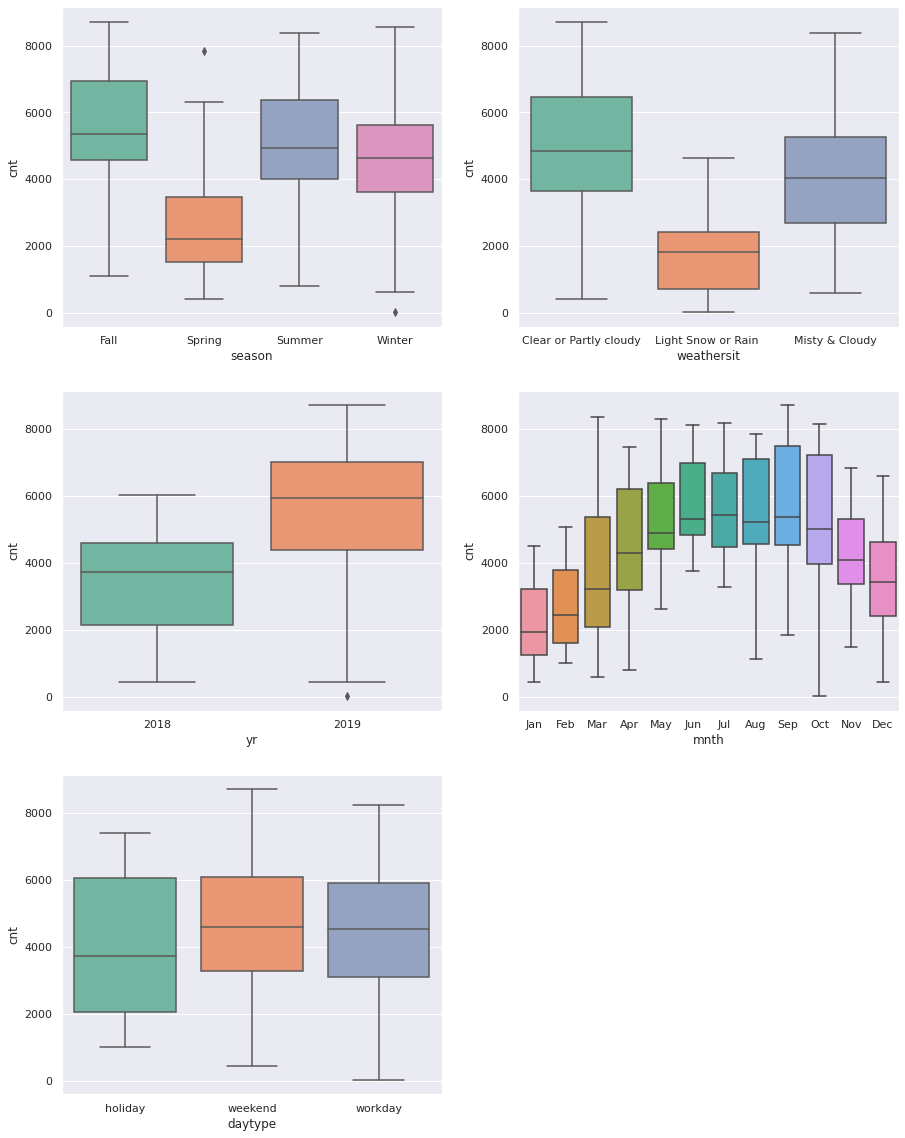

In [2439]:
sns.set_theme(style="darkgrid", palette="Set2")

plt.figure(figsize=(15, 20))
plt.subplot(3,2,1)
sns.boxplot(x='season',y='cnt',data=bike_df)
plt.subplot(3,2,2)
sns.boxplot(x='weathersit',y='cnt',data=bike_df)
plt.subplot(3,2,3)
sns.boxplot(x='yr',y= 'cnt',data=bike_df)
plt.subplot(3,2,4)
sns.boxplot(x='mnth',y='cnt',data=bike_df)
plt.subplot(3,2,5)
sns.boxplot(x='daytype',y='cnt',data=bike_df)
plt.show()

**Observation**: 
- There are no major outliers in the categorical variables.

In [2440]:
#To plot graphs side by side 
def plot_create(x_var,y_var, x_label,hue_var, chart_title):
    g = sns.catplot(x=x_var, y=y_var, hue = hue_var, data=bike_df,
                ci =None,palette="husl", kind='bar',
                height = 8, aspect = 1.5, legend_out=True)
    
    g.set(xlabel = x_label, title = chart_title)

    for container in g.ax.containers:
        g.ax.bar_label(container)

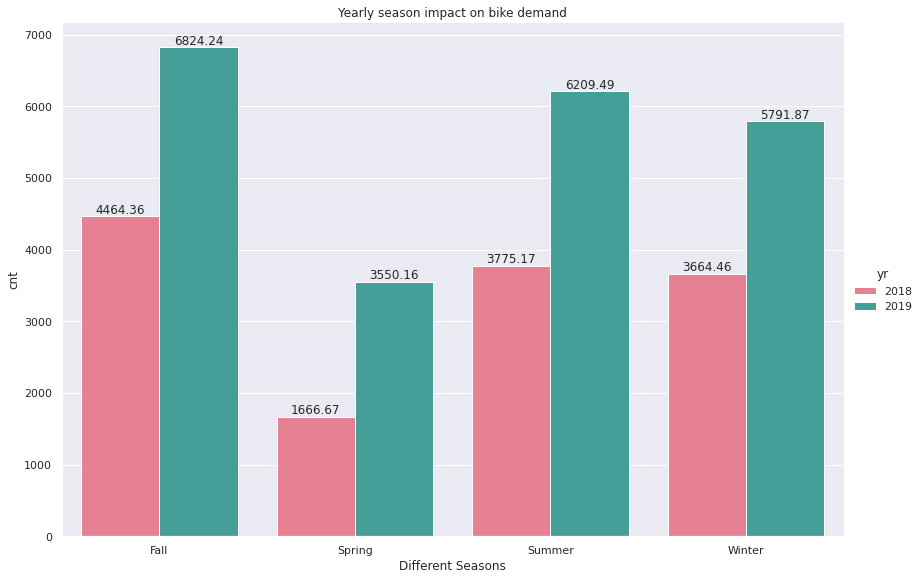

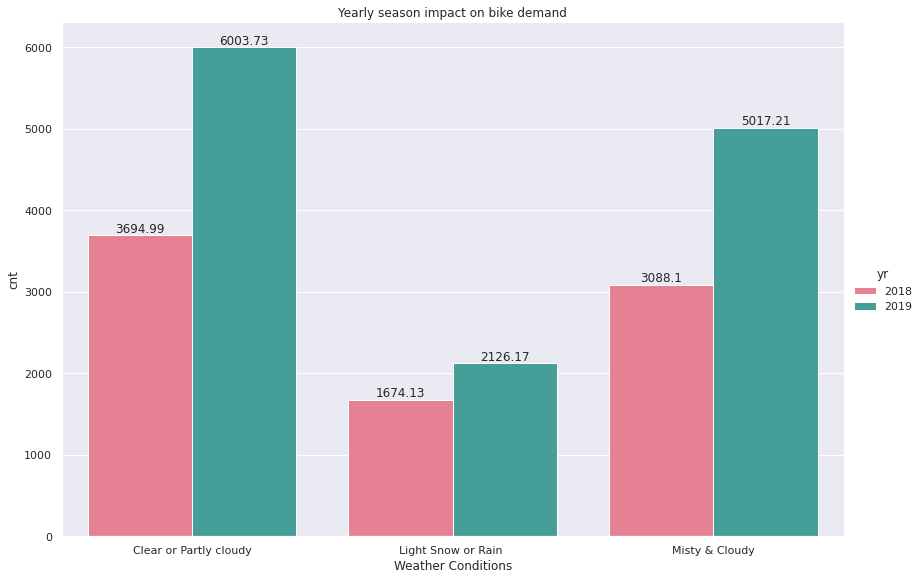

In [2441]:
plot_create('season', 'cnt','Different Seasons', 'yr','Yearly season impact on bike demand')
plot_create('weathersit', 'cnt','Weather Conditions', 'yr','Yearly season impact on bike demand')

**Observation**:
- In both 2018 and 2019, bike demand is lower in Spring season and higest in Fall season.
- In both 2018 and 2019, bike demand falls when the weather has light snow, rain and thunderstorm.

In [2442]:
#copy dataframe so month can be sorted for proper graphical representation
#sorting the month in the actual dataframe will introduce biasness
bike_df_copy = bike_df.copy()
cats = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
bike_df_copy['mnth'] = pd.Categorical(bike_df_copy['mnth'], categories=cats, ordered=True)

#Segmenting dataframe for better visualization
bike_df_2018 = bike_df[~(bike_df_copy.yr == 2019)]
bike_df_2019 = bike_df[~(bike_df_copy.yr == 2018)]


Text(0.5, 1.0, 'Work day Effect on Demand in 2018')

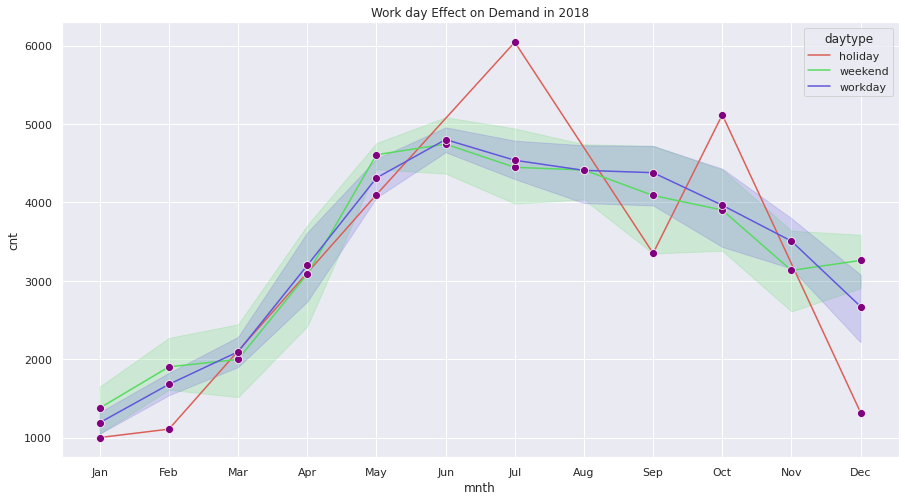

In [2443]:
plt.figure(figsize=(15, 8))
sns.lineplot(x="mnth", y="cnt",hue="daytype" , data=bike_df_2018,marker = 'o', palette="hls",
         markerfacecolor = 'purple', markersize = 8).set_title('Work day Effect on Demand in 2018')


Text(0.5, 1.0, 'Work day Effect on Demand in 2019')

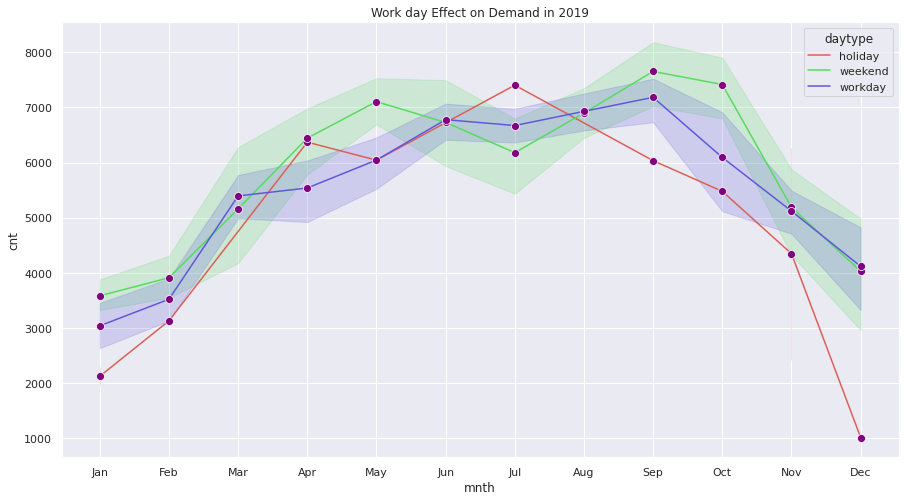

In [2444]:
plt.figure(figsize=(15, 8))
sns.lineplot(x="mnth", y="cnt",hue="daytype" , data=bike_df_2019,marker = 'o', palette="hls",
         markerfacecolor = 'purple', markersize = 8).set_title('Work day Effect on Demand in 2019')


**Observation**: 
- In 2018, most demand were during holidays that fall on weekdays, that could propably mean that people have dedicate more exercising time during their non working day.
- In 2018, there were no distinctive differences between weekends and workday, this could imply that some people actually use the bike as means of transport to work.
- In 2019, the peak was during weekends and holidays both.

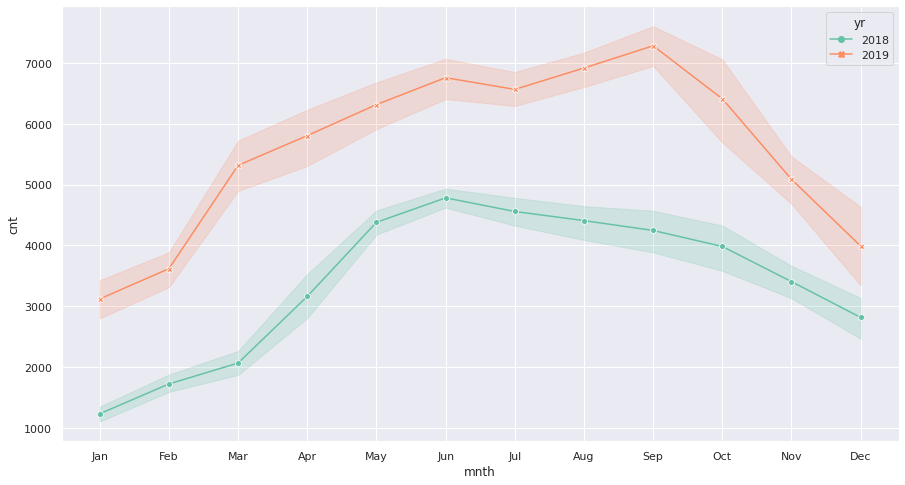

In [2445]:
plt.figure(figsize=(15,8))
sns.lineplot(data=bike_df_copy, x='mnth', y='cnt',hue="yr", style="yr", markers=True, dashes=False)
plt.show()

**Observation**: 
- The plot shows that demands for bike in 2019 was relatively higher than 2018.
- It can also be observed that September was a peak period for 2019, after which there was a considerable fall in demand until december
- The peak period for 2018 was June and it has the falling trend afterwards.

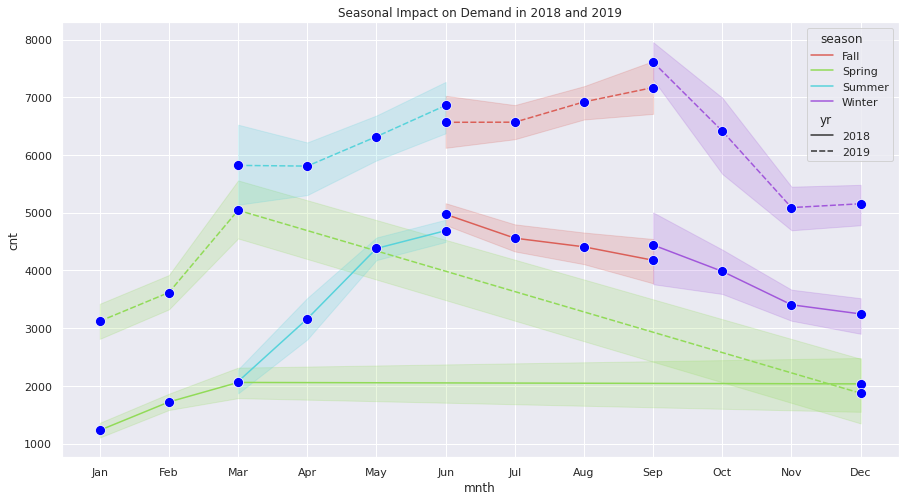

In [2446]:
plt.figure(figsize=(15,8))
sns.lineplot(x="mnth", y="cnt",hue="season" , data=bike_df_copy , style='yr',marker = 'o', palette="hls",
         markerfacecolor = 'blue', markersize = 10).set_title('Seasonal Impact on Demand in 2018 and 2019')
plt.show()

**Observation**: 
- From the previous chart, we noticed a fall in demand, it can be explained by the season.
- We can see a positive trend when it is Summer and fall season for both years, however the trend goes downwards in winter
- So it can be assumed that it snows in winter and it is not convienent to use bikes.

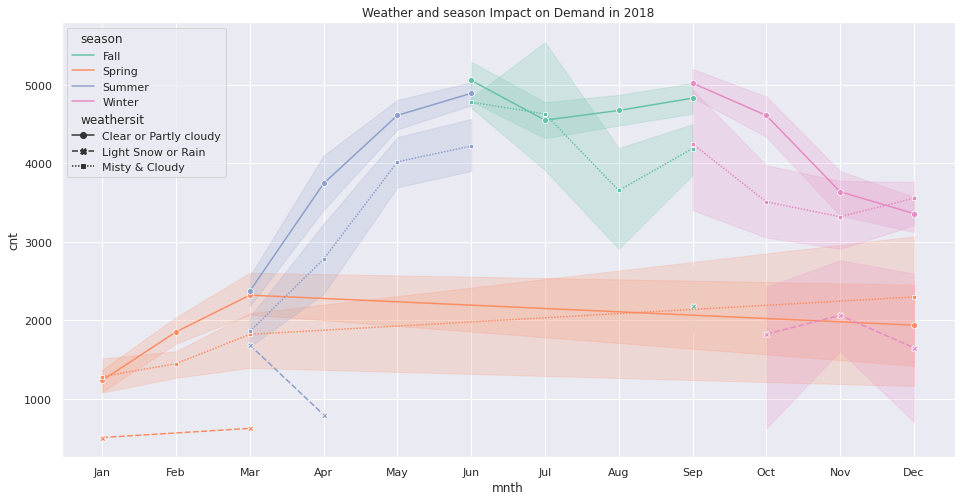

In [2447]:
#Visualizing the effect of season and weather on 2018
plt.figure(figsize=(16,8))
sns.lineplot(data=bike_df_2018, x='mnth', y='cnt',hue="season", style='weathersit', markers = True).set_title('Weather and season Impact on Demand in 2018')
plt.show()

**Observation**: 
- It can be clearly seen that the fall in 2018 mostly happen in Winter, the fall become more drastic when the weather has "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
- In 2018, there is a positive trend from spring to summer and fall, peaking in fall season. 
- In 2018, the weather in spring to summer, whether it is clear or misty, the demand keep increasing.
- In 2018, however in fall season, when the weather is misty, there is a slight fall in August. That could be because the misty weather in fall is really bad, making it incovenient to ride bikes.

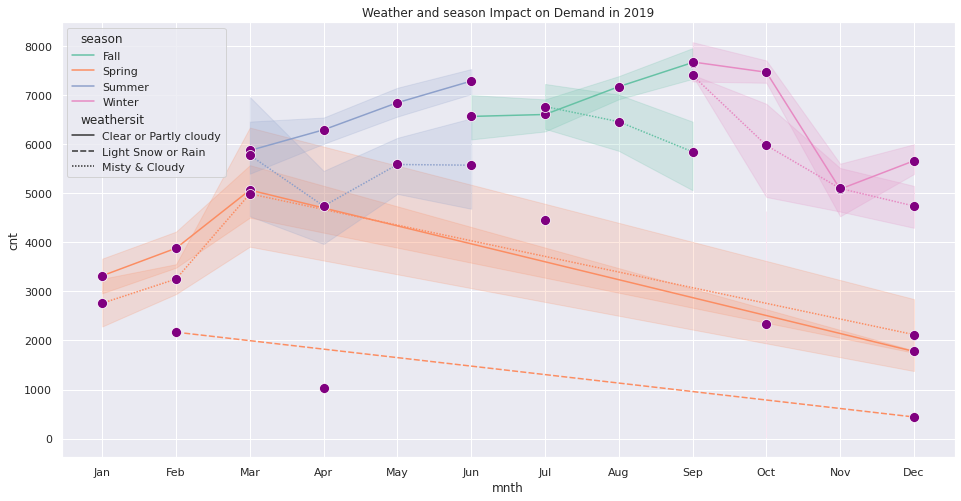

In [2448]:
#Visualizing the effect of season and weather on 2019
plt.figure(figsize=(16,8))
sns.lineplot(x="mnth", y="cnt",hue="season" , data=bike_df_2019 , style='weathersit',marker = 'o', palette="Set2",
         markerfacecolor = 'purple', markersize = 10).set_title('Weather and season Impact on Demand in 2019')
plt.show()

**Observation**: 
- It can be clearly seen that the fall in 2019 mostly happen in Winter. 
- The weather in general in 2019 were not as bad as 2018, explaining the increase in demand in 2019
- In 2019, we can notice a drastic fall when the season is changing to Spring and the weather is "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds".
- In 2019, the demand in Summer and fall season increase when the weather is clear and drop slightly When it is misty. 
- In 2019, the highest peak is observe at the end of fall season which is September when the weather is clear.

### Visualizing Numerical Variables

<Figure size 1080x2160 with 0 Axes>

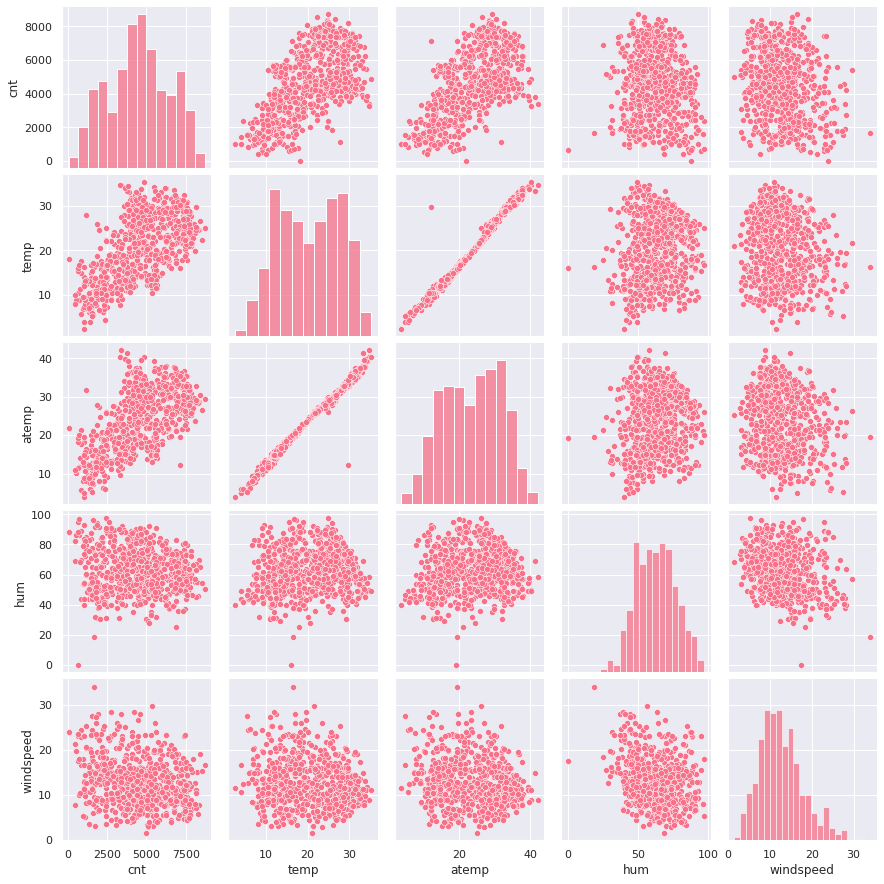

In [2449]:
#Draw pairplots for continuous numeric variables using seaborn
sns.set_theme(style="darkgrid", palette="husl")

plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

**Observation**:
- The target variable `cnt` is highly correlated with feature temp and atemp, confirming some linear relationship.
- `atemp` and `temp` share a very high correlation. 

### Correlation visualization

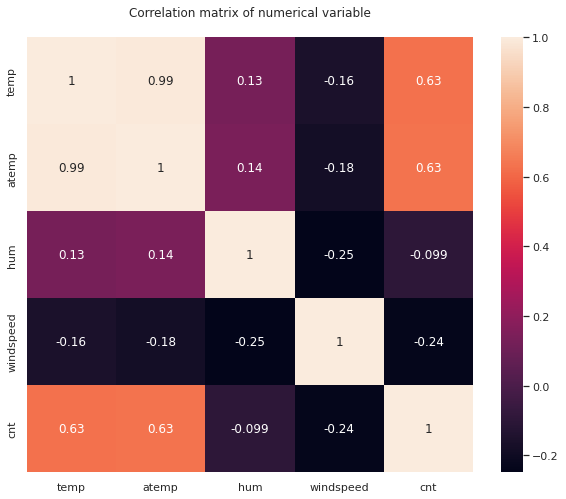

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [2450]:
#Plotting to see the correlation between continuous variable 
num_bike_df  = bike_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

plt.figure(figsize=(10,8))

hm = sns.heatmap(num_bike_df.corr(), annot = True)
hm.set(title = "Correlation matrix of numerical variable\n")
plt.show()

corr = num_bike_df.corr()
corr.style.background_gradient(cmap='coolwarm')

**Observation**:
- The correlation table gives us a more precise statistics and target variable `cnt` has the higest positive correlation with the variable `atemp`, followed by `temp` (second highest).
- The dependent variable `cnt` has a negative correlation with `hum` and `windspeed` features.

## 4. Data Preparation

This is one of the most important phase because it prepares the data for the model.
- Transform all categorical data by encoding because ML only accept numerical data
- Drop respective columns after encoding.
#### Scaling is also a process in data pre processing, however this step shall only be performed after the dataframe has been split into train and test set ( next stage).

In [2451]:
#check the first 5 rows of the data set
bike_df.head()

,season,yr,mnth,weathersit,temp,atemp,hum,windspeed,cnt,weekday,daytype
0,Spring,2018,Jan,Misty & Cloudy,14.110847,18.18125,80.5833,10.749882,985,Monday,workday
1,Spring,2018,Jan,Misty & Cloudy,14.902598,17.68695,69.6087,16.652113,801,Tuesday,workday
2,Spring,2018,Jan,Clear or Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349,Wednesday,workday
3,Spring,2018,Jan,Clear or Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562,Thursday,workday
4,Spring,2018,Jan,Clear or Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600,Friday,workday


### Dummy Variables

Dummy variables will be created for the following categorical feature: 
1. season
2. weathersit
3. yr
4. mnth
5. weekday
6. daytype

A dummy variable is a numerical variable that will represent subgroups of the above mentioned features. It is important to note that the first value in each feature will be dropped to reduce collinearity.

In [2452]:
#Creating dummy variables while dropping the first value 
season = pd.get_dummies(bike_df['season'], drop_first = True)
weather = pd.get_dummies(bike_df['weathersit'], drop_first = True)
year = pd.get_dummies(bike_df['yr'], drop_first = True)
month = pd.get_dummies(bike_df['mnth'], drop_first = True)
weekday = pd.get_dummies(bike_df['weekday'], drop_first = True)
daytype = pd.get_dummies(bike_df['daytype'], drop_first = True)


# Add the dummy variable result to the original bike dataframe
bike_df = pd.concat([bike_df, season, weather, year, month, weekday, daytype],axis=1)

# Check the head of the dataframe
bike_df.head()

,season,yr,mnth,weathersit,temp,atemp,hum,windspeed,cnt,weekday,daytype,Spring,Summer,Winter,Light Snow or Rain,Misty & Cloudy,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend,workday
0,Spring,2018,Jan,Misty & Cloudy,14.110847,18.18125,80.5833,10.749882,985,Monday,workday,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,Spring,2018,Jan,Misty & Cloudy,14.902598,17.68695,69.6087,16.652113,801,Tuesday,workday,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,Spring,2018,Jan,Clear or Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349,Wednesday,workday,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,Spring,2018,Jan,Clear or Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562,Thursday,workday,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,Spring,2018,Jan,Clear or Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600,Friday,workday,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [2453]:
#Given that the categorical variables has already been encoded, we will now drop them.
bike_df.drop(['season','weathersit','yr', 'mnth', 'daytype', 'weekday'], axis = 1, inplace = True)
# Check the head of the dataframe
bike_df.head()

,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow or Rain,Misty & Cloudy,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend,workday
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [2454]:
#making sure all data types are numerical
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 730 non-null    float64
 1   atemp                730 non-null    float64
 2   hum                  730 non-null    float64
 3   windspeed            730 non-null    float64
 4   cnt                  730 non-null    int64  
 5   Spring               730 non-null    uint8  
 6   Summer               730 non-null    uint8  
 7   Winter               730 non-null    uint8  
 8   Light Snow or Rain   730 non-null    uint8  
 9   Misty & Cloudy       730 non-null    uint8  
 10  2019                 730 non-null    uint8  
 11  Aug                  730 non-null    uint8  
 12  Dec                  730 non-null    uint8  
 13  Feb                  730 non-null    uint8  
 14  Jan                  730 non-null    uint8  
 15  Jul                  730 non-null    uin

In [2455]:
bike_df.shape

(730, 30)

## 5. Data Modelling

Following data understanding and data preparation, the fifth phase in the data pipeline involves the creation of intelligent machine learning models to support advanced analytics. It follows the steps below:
 
 1. Split the data into training and testing sets
 2. Feature Scaling
 3. Build Model
 4. Train the final model on the data

### Split into Training and Testing Sets

This is an important step to evaluate the final model -- after the model has been processed by using the training set, the model can be tested by making predictions against the test set. 

It is easy to determine whether the model's prediction are correct, because the test set already contain the values for 'cnt'.

In [2456]:
# We select the random_state to avoid getting different values for train and test sets every time it runs. 
df_train, df_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [2457]:
# Check the train set shape, it should contain 70% of the total rows
df_train.shape

(510, 30)

In [2458]:
# Check the test set shape, it should contain 30% of the total rows
df_test.shape

(220, 30)

### Feature Scaling

Scaling will be performed to generalize data points so that the distance between them will be lower. Scaling is important because it optimises the training process and do not give higher importance to higher value unnecessarily.

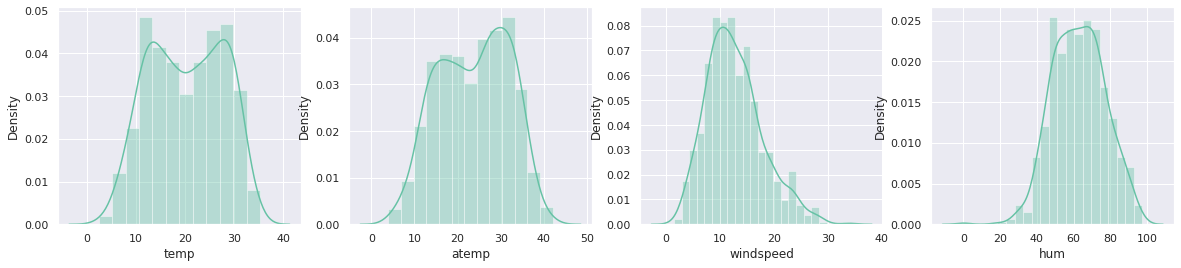

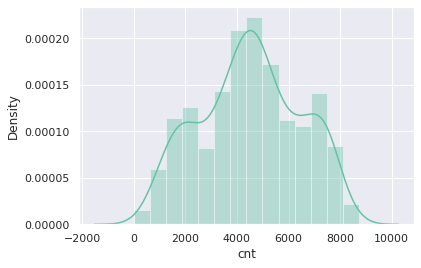

In [2459]:
#Visualize the data distribution of the continuous variable to decide whether to normalise or standardize
sns.set_theme(style="darkgrid", palette="Set2")

plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
sns.distplot(bike_df['temp'])
plt.subplot(1,4,2)
sns.distplot(bike_df['atemp'])
plt.subplot(1,4,3)
sns.distplot(bike_df['windspeed'])
plt.subplot(1,4,4)
sns.distplot(bike_df['hum'])
plt.show()

sns.distplot(bike_df['cnt'])
plt.show()


Standardization works better when the data has a Gaussian (bell curve) distribution which is not entirely the case with the continous feature we want to scale. Hence, we choose the **normalization approach**. 

The data will be normalised by using **MinMaxScaler**, which will rescale the features to a range of [0, 1]

In [2460]:
mm_scaler = MinMaxScaler()

In [2461]:
# Apply mm_scaler() to all continuous variables
cont_feature = ['temp', 'atemp', 'windspeed', 'hum', 'cnt']

df_train[cont_feature] = mm_scaler.fit_transform(df_train[cont_feature])

In [2462]:
#check the first 5 rows of the dataframe after the scaling
df_train.head()

,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow or Rain,Misty & Cloudy,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend,workday
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [2463]:
# Visualizing the correlation coefficients between features 
#since there are too many features, using a heatmap will be hard for proper visualization
corr = df_train.corr()
corr.style.background_gradient(cmap='viridis')

,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow or Rain,Misty & Cloudy,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend,workday
temp,1.000000,0.989539,0.155252,-0.187281,0.645048,-0.606396,0.126057,-0.234200,-0.036227,-0.089452,0.108054,0.387176,-0.273091,-0.296213,-0.446941,0.413678,0.301219,-0.179941,0.155168,-0.194994,-0.018286,0.207212,-0.038042,0.024972,0.006540,0.074647,-0.002284,-0.044303,0.024044,-0.007143
atemp,0.989539,1.000000,0.169341,-0.215108,0.647944,-0.611118,0.136550,-0.211852,-0.044398,-0.085086,0.104971,0.359727,-0.262072,-0.299686,-0.451026,0.406832,0.293970,-0.178698,0.161665,-0.185918,-0.005162,0.205900,-0.037163,0.011785,0.006044,0.078295,0.002480,-0.041378,0.013648,0.004316
hum,0.155252,0.169341,1.000000,-0.267126,-0.058793,-0.201616,-0.014192,0.173980,0.244965,0.479436,-0.084061,0.052949,0.057615,-0.129780,-0.071906,-0.054070,-0.095077,-0.111040,0.145409,0.004676,0.167153,0.152439,-0.030833,0.002489,-0.027699,-0.057323,0.033232,0.028329,-0.019665,0.021192
windspeed,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,0.180351,0.110441,-0.090740,0.086778,-0.029892,-0.000439,-0.111460,-0.061179,0.132936,0.006582,-0.085671,-0.033103,0.141944,-0.034342,0.009742,-0.018546,-0.121930,0.035097,-0.016545,0.018007,-0.021779,0.035326,-0.055798,0.001454,-0.002071
cnt,0.645048,0.647944,-0.058793,-0.253038,1.000000,-0.548987,0.140259,0.025945,-0.226678,-0.169715,0.591433,0.227578,-0.143546,-0.270351,-0.378296,0.158087,0.195411,-0.137465,0.113276,-0.048002,0.055558,0.201639,-0.071013,0.012712,0.031474,0.110734,-0.018672,-0.020949,0.034141,-0.009071
Spring,-0.606396,-0.611118,-0.201616,0.180351,-0.548987,1.000000,-0.324666,-0.324666,-0.044558,0.011613,-0.036320,-0.184784,0.041868,0.471540,0.548861,-0.163094,-0.163094,0.305009,-0.171986,-0.174161,-0.171986,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987,0.009647,-0.032886
Summer,0.126057,0.136550,-0.014192,0.110441,0.140259,-0.324666,1.000000,-0.328125,-0.045901,0.043202,0.018294,-0.186753,-0.173818,-0.153093,-0.178197,-0.164832,0.262846,0.086333,0.529732,-0.176016,-0.173818,-0.169366,-0.019069,-0.004143,-0.017097,0.064448,-0.003418,-0.000625,-0.016449,0.033299
Winter,-0.234200,-0.211852,0.173980,-0.090740,0.025945,-0.324666,-0.328125,1.000000,0.115543,0.024076,-0.027174,-0.186753,0.317031,-0.153093,-0.178197,-0.164832,-0.164832,-0.188854,-0.173818,0.536431,0.529732,-0.018884,0.018626,-0.017687,-0.030308,-0.052383,0.047105,0.039249,-0.037010,0.033299
Light Snow or Rain,-0.036227,-0.044398,0.244965,0.086778,-0.226678,-0.044558,-0.045901,0.115543,1.000000,-0.126365,-0.060764,-0.056753,-0.011056,-0.000000,-0.054153,-0.006422,-0.050092,0.020661,-0.052822,0.029177,0.156011,0.033894,0.021698,0.036609,-0.035708,-0.071148,-0.041726,-0.000998,-0.000000,0.008289
Misty & Cloudy,-0.089452,-0.085086,0.479436,-0.029892,-0.169715,0.011613,0.043202,0.024076,-0.126365,1.000000,-0.011388,0.015258,0.017231,-0.012125,0.065009,-0.115763,-0.084722,-0.003535,0.076606,-0.017398,0.017231,0.043247,-0.037194,0.027322,0.070034,-0.061149,-0.010515,0.014328,0.075237,-0.066206


### Divide into X and Y sets for the model building

Y being the target variable, `cnt` is this dataframe target variable. While X are all independent features.

In [2464]:
y_train = df_train.pop('cnt')
X_train = df_train

### Feature Selection

The **RFE approach** will be used for feature selection. RFE selects those features in a training dataset that are more or most relevant in predicting the target variable.

The library that will be used is **LinearRegression function from SciKit Learn** because it compatible with RFE. 
After a quick observation of all the independent variables' P-value, it was deduced that it will be ideal to select only 17 variables to start with (that is eliminating 12 independent variable at the start).

In [2465]:
# Running RFE with the 17 output variables
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 17)            
rfe = rfe.fit(X_train, y_train)

In [2466]:
#listing the variables, with their status (True for chosen, false for elimination) and their ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 4),
 ('Winter', True, 1),
 ('Light Snow or Rain ', True, 1),
 ('Misty & Cloudy', True, 1),
 (2019, True, 1),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 10),
 ('Mar', False, 13),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 6),
 ('Saturday', False, 3),
 ('Sunday', False, 2),
 ('Thursday', False, 12),
 ('Tuesday', False, 5),
 ('Wednesday', False, 9),
 ('weekend', True, 1),
 ('workday', True, 1)]

In [2467]:
#Keeping all the features rfe chose
retain_cols = X_train.columns[rfe.support_]
retain_cols

Index([               'temp',               'atemp',                 'hum',
                 'windspeed',              'Spring',              'Winter',
       'Light Snow or Rain ',      'Misty & Cloudy',                  2019,
                       'Dec',                 'Feb',                 'Jan',
                       'Jul',                 'Nov',                 'Sep',
                   'weekend',             'workday'],
      dtype='object')

In [2468]:
#Dropping all columns rfe did not select
X_train.columns[~rfe.support_]

Index(['Summer', 'Aug', 'Jun', 'Mar', 'May', 'Oct', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Build model 

In this phase, different models will be built until we select the ideal one. 

The **threshold** for keeping features will be as follows:
- Features that have a **P-value less than 0.05**
- Features that have a **VIF value less than 5**

The p-value determines the statistical significance of the variables while the VIF (Variance Inflation Factor) > 5, indicates multicollinearity.
Given that multicollinearity inflates the variance of coefficients and causes type II error, it is vital to compute the VIFs, detect and correct it.

In [2469]:
#Common Function that will be used when building model 

def build_lm(X_train_rfe):
    #Add the constant variable so that statsmodel fits a line through the intercept too
    X_train_rfe = sm.add_constant(X_train_rfe)

    # Perform OLS regression and fit the regression line
    lm = sm.OLS(y_train,X_train_rfe).fit()
    return lm

In [2470]:
#Common Function that will be used when calculating VIF
def calc_vif(feature):
    vif = pd.DataFrame()
    vif['Features'] = feature.columns
    vif['VIF'] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model 1

We are not checking VIF at this stage because the P-value itself is pretty high and we will deal with those variables first. Once all the P-values of the features is within the acceptable range which is less than 0.05, then we shall calculate the VIFs and keep those features that have a VIF value of less than 5.

Reason being, since VIF detect the severity of multicollinearity, the moment we drop variables based on P-value, the VIF will automatically change (becomes lower).

In [2471]:
# Creating X_test dataframe using selected variables from RFE
X_train_rfe = X_train[retain_cols]

In [2472]:
#Build model 1 and check the detailed statistics
lm_1= build_lm(X_train_rfe)
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.56e-186
Time:                        18:34:57   Log-Likelihood:                 512.79
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     492   BIC:                            -913.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2919    

**Deduction:**
- `atemp`  has the highest p-value which is 0.434. From our previous visualization, we noticed that atemp and temp has the highest collinearity also.
- Given that we already have `temp` variable, dropping `atemp` will not affect the model in terms of its business aspect.
- It can be deduced that `atemp` is insignificant in presence of other variables and will hence be dropped.
- Both the R-sqaured and adjusted R-squared value are greater than 80%. It indicates that the model fits the data by 80% which is good.

### Model 2

We are dropping the feature `atemp` because it has the highest P-value in Model 1 which is 0.434 and it is definitely not within the acceptable range. 

In [2473]:
#Dropping feature 'atemp' from list of chosen variables.
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

In [2474]:
#Build model 2 and check the detailed statistics
lm_2= build_lm(X_train_new)

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     166.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.75e-187
Time:                        18:34:57   Log-Likelihood:                 512.48
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     493   BIC:                            -919.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2933    

**Deduction:**
- `Feb` p-value is only slightly higher but it is still considered outside of the acceptable range. 
- It can be deduced that `Feb` is insignificant in presence of other variables and will hence be dropped.
- There were no change in the R-squared and adjusted R-sqaured value between the first and second model. which is a good indicator. 

### Model 3

We are dropping the feature `Feb` because it has a slight high P-value which is 0.051.

In [2475]:
#Dropping feature 'Feb' from list of chosen variables.
X_train_new = X_train_new.drop(['Feb'], axis = 1)

In [2476]:
#Build model 3 and check the detailed statistics
lm_3 = build_lm(X_train_new)
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.81e-187
Time:                        18:34:57   Log-Likelihood:                 510.51
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     494   BIC:                            -921.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2805    

**Deduction:**
- The P value of all the features are below 0.05 and hence we will now check the VIF of those feature.
##### Further feature elimination will be carried out based on the VIF value. 
##### Feature with VIF values less than 5 will be kept.

In [2477]:
#Computing the VIF
vif_v = calc_vif(X_train_new)
vif_v

,Features,VIF
1,hum,30.95
0,temp,19.56
14,workday,19.42
13,weekend,7.83
2,windspeed,4.68
3,Spring,3.14
4,Winter,3.05
6,Misty & Cloudy,2.32
7,2019,2.08
11,Nov,1.81


**Deduction:**
- The VIF value of `hum` variable is the highest, it hold a value of 30.95. 
- `hum` will be dropped because the information provided by the it is redundant. Nonetheless, the coefficient of determination will not be greatly impaired by the removal. 
- In terms of weather condition, there are other supporting features.

### Model 4

We are dropping the feature `hum` because it has the highest VIF value of 30.95.

In [2478]:
#Dropping feature 'hum' from list of chosen variables.
X_train_new = X_train_new.drop(['hum'], axis = 1)

In [2479]:
#Build model 4 and check the detailed statistics
lm_4 = build_lm(X_train_new)
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.10e-185
Time:                        18:34:57   Log-Likelihood:                 503.31
No. Observations:                 510   AIC:                            -976.6
Df Residuals:                     495   BIC:                            -913.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2041    

In [2480]:
#Computing the VIF
vif_v = calc_vif(X_train_new)
vif_v

,Features,VIF
13,workday,15.43
0,temp,13.78
12,weekend,6.57
1,windspeed,4.64
2,Spring,2.92
3,Winter,2.83
6,2019,2.07
10,Nov,1.80
8,Jan,1.72
5,Misty & Cloudy,1.59


**Deduction:**
- The VIF value of `workday` variable is the highest, it hold a value of 15.43. 
- However `workday` will not be dropped and in terms of business aspect, it is a strong indicator.
- Instead, we will drop `weekend` variable (whose VIF is also high - 6.57), because it is understood that if a day is not workday, it means it is either holiday or weekend. However, if we were to keep the variable `weekend` and drop `workday`, we will not be able to know whether it is really a workday as the holiday column is not present. 

### Model 5

We are dropping the feature `weekend` because it has a high VIF value of 6.57.

In [2481]:
#Dropping feature 'weekend' from list of chosen variables.
X_train_new = X_train_new.drop(['weekend'], axis = 1)

In [2482]:
#Build model 5 and check the detailed statistics
lm_5 = build_lm(X_train_new)

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.44e-184
Time:                        18:34:57   Log-Likelihood:                 497.03
No. Observations:                 510   AIC:                            -966.1
Df Residuals:                     496   BIC:                            -906.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3003    

In [2483]:
#compute the VIF
vif_v = calc_vif(X_train_new)
vif_v

,Features,VIF
0,temp,5.74
1,windspeed,4.12
12,workday,3.22
3,Winter,2.61
2,Spring,2.41
6,2019,2.06
10,Nov,1.79
8,Jan,1.66
5,Misty & Cloudy,1.53
7,Dec,1.47


**Deduction:**
- The VIF value of `workday` variable has dropped to 3.22, hence dropping `weekend` was a good call.
- However `temp` currently has the highest VIF but will not be dropped and in terms of business aspect, it is a strong indicator.
- Instead, we will drop `windspeed` variable, because the model has other season variables.
- Both the R-squared and adjusted R-squared values are still good.

### Model 6

We are dropping the feature `windspeed` because `temp` variable is an important factor.

In [2484]:
#Dropping feature 'windspeed' from list of chosen variables.
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

In [2485]:
#Build model 6 and check the detailed statistics
X_train_lm = sm.add_constant(X_train_new)

lm_6 = sm.OLS(y_train, X_train_lm).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.39e-177
Time:                        18:34:57   Log-Likelihood:                 478.67
No. Observations:                 510   AIC:                            -931.3
Df Residuals:                     497   BIC:                            -876.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2289    

In [2486]:
#compute the VIF
vif_v = calc_vif(X_train_new)
vif_v

,Features,VIF
0,temp,4.47
11,workday,3.17
2,Winter,2.59
5,2019,2.06
1,Spring,2.03
9,Nov,1.77
7,Jan,1.65
4,Misty & Cloudy,1.52
6,Dec,1.47
8,Jul,1.35


**Deduction:**
- All the features' P-value and VIF are within the acceptable range
- We can conclude that this is our final model and it will be used for making for making predictions
- Based on the R-squared, the regression model fits our observations by 82%. Hence the model is reliable.

## 6. Model Evaluation

In this phase, we shall : 
 - Conduct Residual Analysis on the training data
 - Make prediction using the Test set
 - Evaluate the predicted outcome.

In [2487]:
#listing the coefficient of variables in the final model
lm_6.params

const                  0.228865
temp                   0.430638
Spring                -0.112264
Winter                 0.071173
Light Snow or Rain    -0.304331
Misty & Cloudy        -0.077771
2019                   0.234018
Dec                   -0.040589
Jan                   -0.039322
Jul                   -0.061422
Nov                   -0.055633
Sep                    0.057347
workday               -0.011763
dtype: float64

In [2488]:
#storing the variables used in the model (useful when dealing with test set)
imp_feature = list(lm_6.params.index)
print (imp_feature)

['const', 'temp', 'Spring', 'Winter', 'Light Snow or Rain ', 'Misty & Cloudy', 2019, 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'workday']


In [2489]:
#delete the const value from the variable list
del imp_feature[0]
print (imp_feature)

['temp', 'Spring', 'Winter', 'Light Snow or Rain ', 'Misty & Cloudy', 2019, 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'workday']


### Make Prediction on Train Set

In [2490]:
#Making Predictions
y_train_cnt = lm_6.predict(X_train_lm)

In [2491]:
#calculating the statistics to evaluate how reliable the model is based on test data
mse_train = mean_squared_error(y_train, y_train_cnt)
r_squared_train = r2_score(y_train, y_train_cnt)

print('Mean Squared Error is :' ,mse_train)
print('R-squared Value is :',r_squared_train)

Mean Squared Error is : 0.008959836856034761
R-squared Value is : 0.8217514244469368


### Residual Analysis of the train data

In this section, we shall check if the error terms are normally distributed. It is one of the four major assumptions of linear regression

p-value (below 0.05 generally means non-normal): 5.71836388306072e-11


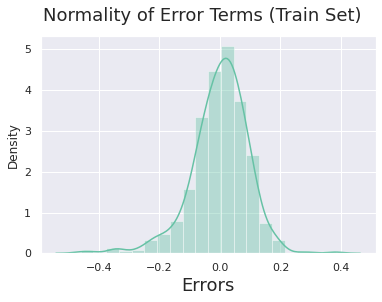

In [2493]:
#Testing Normality assumptions
# Plot the histogram of the error terms
# Compare the errors between actual 'cnt' in the y_train against the predicted 'cnt' stored in y_train_cnt
fig = plt.figure()
residuals = abs(y_train) - abs(y_train_cnt)

sns.distplot(residuals, bins = 20)
fig.suptitle('Normality of Error Terms (Train Set)', fontsize = 18)                  
plt.xlabel('Errors', fontsize = 18) 

#normal ad statictics for p-value computation
p_value = normal_ad(residuals)[1]
print('p-value (below 0.05 generally means non-normal):', p_value)


The Distribution plot shows a perfect normal distribution and hence the errors are normally distributed with mean of 0,satisfying the normality assumption of linear regression. The Anderson-Darling test for normal distribution also proves the same as the p-value is way higher than the threshold of 0.05.

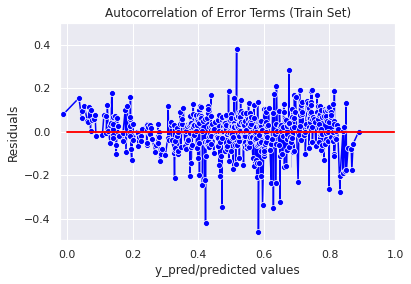

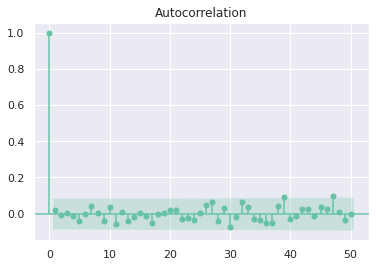

Durbin-Watson: 1.9547620608651484


In [2496]:
# Plot the line plot of the error terms
# Check for Autocorrelation
p = sns.lineplot(y_train_cnt,(y_train - y_train_cnt),marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(-0.02,1)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Autocorrelation of Error Terms (Train Set)')

#partial analysis
p = sns.lineplot([0,1],[0,0],color='red')
sm.graphics.tsa.plot_acf(residuals, lags=50)
plt.show()

#durbin watsons statistic
durbinWatson = durbin_watson(residuals)
print('Durbin-Watson:', durbinWatson)


The plot does not seem to have a distinctive pattern. Moreover,considering the Durbin-Watson statistic, when the value is close to 2, the is little to no correlation. Since the calculated value is 1.95, there is almost no autocorrelation. The errors are independent of each other, satisfying the 'No autocorrelation' assumption of linear regression.

[('F statistic', 1.0090037830352643), ('p-value', 0.473111786766807)]

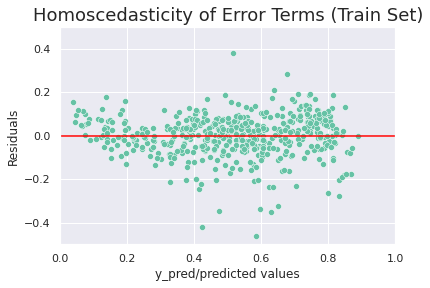

In [2497]:
# Plot the scatterplot of the error terms for homoscedasticity
p = sns.scatterplot(y_train_cnt,(y_train - y_train_cnt))
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Homoscedasticity of Error Terms (Train Set)', fontsize = 18)  

#goldfeld-quandt statistics for verification 
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)


The variance does not increase as the error values change, nor does the variance follow any pattern. This satisfies the last assumptions about errors in linear regression. The goldfeld-quandt algorithm confirms the same.

### Make Prediction on Test Set

In this section, we shall make prediction using the sixth model. Prediction shall be made on the test set and this shall provide a more significant evaluation on the model.

### Scale features in Test Set
The same normalization technique will be used on the test set, which is MinMaxScaler.

In [2338]:
#continuous variable that need scaling
cont_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
#Performing scaling
df_test[cont_var] = mm_scaler.transform(df_test[cont_var])

In [2339]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow or Rain,Misty & Cloudy,2019,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,weekend,workday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,1.896308,0.129824,0.522154,0.254545,0.263636,0.236364,0.027273,0.318182,0.481818,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.327273,0.640909
std,0.233187,0.217401,0.462995,0.051252,0.219163,0.436599,0.441609,0.425817,0.163248,0.466833,0.500809,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.470288,0.480828
min,0.046591,0.025950,0.724590,0.015460,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,1.556837,0.093068,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,1.856980,0.125596,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.755981,0.713308,2.225046,0.158544,0.677750,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.984424,0.980934,3.029478,0.288534,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Divide into X_test and y_test

Y being the target variable, `cnt` is this dataset target variable. While X are all independent features.

In [2340]:
y_test = df_test.pop('cnt')
X_test = df_test

### Test Set Prediction

In [2341]:
# Creating X_test_m6 dataframe by assigning the relevant features required by the model only
X_test_m6 = X_test[imp_feature]

In [2342]:
# Adding constant variable to test dataframe (required by statsmodel)
X_test_m6 = sm.add_constant(X_test_m6)

In [2343]:
# Making predictions on test set using the sixth model
y_pred_m6 = lm_6.predict(X_test_m6)

### Evaluate Model  - on test set

In [2344]:
#calculating the statistics to evaluate how reliable the model is based on test data
mse_test = mean_squared_error(y_test, y_pred_m6)
r_squared_test = r2_score(y_test, y_pred_m6)

print('Mean Squared Error is :' ,mse_test)
print('R-squared Value is :',r_squared_test)

Mean Squared Error is : 0.008449908183148757
R-squared Value is : 0.8232764715856571


Text(0, 0.5, 'Index')

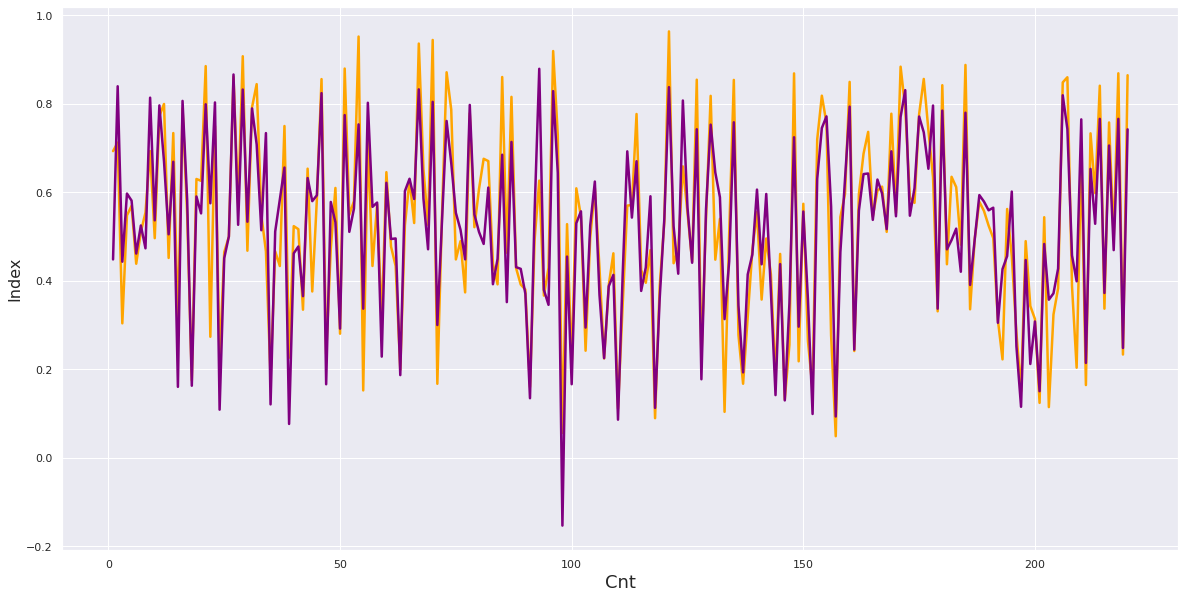

In [2345]:
#Plotting the actual cnt against Predicted cnt
rows = [i for i in range(1,221,1)]
plt.figure(figsize=(20, 10))
plt.plot(rows,y_test, color="orange", linewidth=2.5, linestyle="-")
plt.plot(rows,y_pred_m6, color="purple",  linewidth=2.5, linestyle="-")
#Plot title and labeling
fig.suptitle('Actual vs Predicted Cnt', fontsize=20)              
plt.xlabel('Cnt', fontsize=18)                               
plt.ylabel('Index', fontsize=16)                               

### Check Error Assumptions

Mean of Residuals 0.0043258201825342206


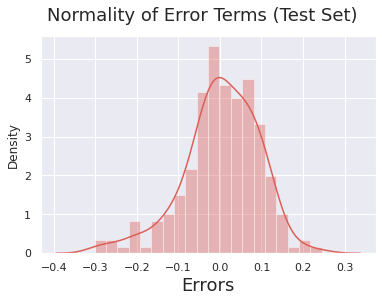

In [2359]:
sns.set_theme(style="darkgrid", palette="hls")
#Testing Normality assumptions
# Plot the histogram of the error terms 
# Compare the errors between actual 'cnt' in the y_train against the predicted 'cnt' stored in y_train_cnt
fig = plt.figure()
residuals = abs(y_test) - abs(y_pred_m6)

sns.distplot(residuals, bins = 20)
fig.suptitle('Normality of Error Terms (Test Set)', fontsize = 18)                  
plt.xlabel('Errors', fontsize = 18) 

#normal ad statictics for p-value computation
mean_residuals = np.mean(y_test.values-y_pred_m6)
print("Mean of Residuals {}".format(mean_residuals))

The histogram shows a relatively normal distribution and as such the errors can be considered as nearly normally distributed. The mean calculation also shows that the mean is very close to 0. Thus, satisfying normality assumption of linear regression.

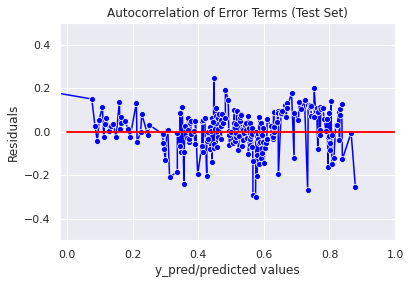

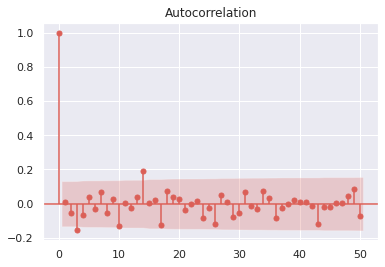

Durbin-Watson: 1.9360880569579606


In [2356]:
# Plot the line plot of the error terms
# Check for Autocorrelation
p = sns.lineplot(y_pred_m6,(y_test - y_pred_m6),marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(-0.02,1)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Autocorrelation of Error Terms (Test Set)')

#partial analysis
p = sns.lineplot([0,1],[0,0],color='red')
sm.graphics.tsa.plot_acf(residuals, lags=50)
plt.show()

#durbin watsons statistic
durbinWatson = durbin_watson(residuals)
print('Durbin-Watson:', durbinWatson)


The plot does not seem to have a distinctive pattern. Moreover,considering the Durbin-Watson statistic, when the value is close to 2, the is little to no correlation. Since the calculated value is 1.93, there is almost no autocorrelation. The errors are independent of each other, satisfying the 'No autocorrelation' assumption of linear regression.

[('F statistic', 0.6662063928668849), ('p-value', 0.9661596433380274)]

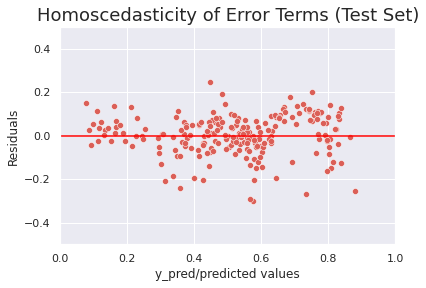

In [2355]:
# Plot the scatterplot of the error terms
# Check for visible pattern
p = sns.scatterplot(y_pred_m6,(y_test - y_pred_m6))
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Homoscedasticity of Error Terms (Test Set)', fontsize = 18)  

#goldfeld-quandt statistics for verification 
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)
lzip(name, test)


There seem to have a relatively constant variance, it is not following any pattern in the plot above. This satisfies the homoscedasticity assumption about errors in linear regression.

## Conclusion


In [1911]:
print('Train Set MSE is: ', round(mse_train,5))
print('Test Set MSE is : ' , round(mse_test,5))
print('Train Set R-Squared is :' , round(r_squared_train,2))
print('Test Set R-Squared is :' , round(r_squared_test,2))

Train Set MSE is:  0.00896
Test Set MSE is :  0.00845
Train Set R-Squared is : 0.82
Test Set R-Squared is : 0.82


In [2408]:
train_rmse = np.sqrt(mse_train)
test_rmse = np.sqrt(mse_test)

print('Train Set RMSE is: ', round(train_rmse,5))
print('Test Set RMSE is : ' , round(test_rmse,5))

Train Set RMSE is:  0.09466
Test Set RMSE is :  0.09192


In [2395]:
importance = lm_6.params
feature_importance = {}
coef_list = []
for i,v in enumerate(importance):
    if i == 0: 
        continue
    else:
        coef_list.append(v)
        
feature_importance =  dict(zip(imp_feature, coef_list))

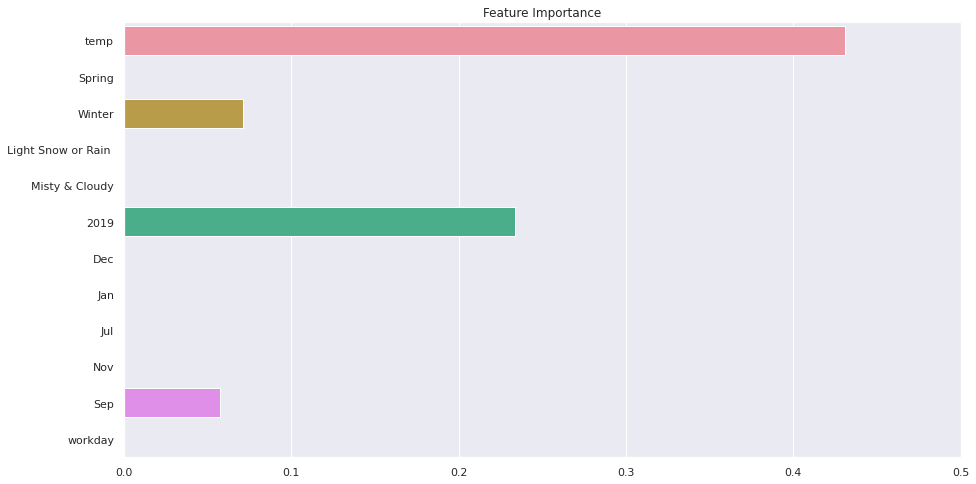

In [2409]:
plt.figure(figsize=(15, 8))
plt.xlim(0,0.5)
ax = sns.barplot(y=imp_feature, x=coef_list , orient = "h").set_title('Feature Importance')

The top features contributing significantly to the demand of shared bikes are: 
1. temp
2. Year - 2019 
3. Winter
4. Sep

The equation for our best fitted line is as follows : 

cnt = (0.431 x temp) - (0.112 x  Spring) + (0.071 x Winter) - (0.304 x Light Snow or Rain) -
(0.078 x Misty & Cloudy) + (0.234 x 2019) - (0.041 x Dec) - (0.039 x Jan) - (0.061 x Jul) - (0.056 x Nov) +
(0.057 x Sep) - (0.012 x workday)

We can conclude that we have an aqeduate model. 
- The RMSE for the training and the test sets is very similar, hence signifing that the model is predictive ability is good 
- The R-squared value for both sets are 82%. It indicates that the strength of the relationship between the sixth model and the dependent variable is on an 82% scale.
- As such, we can assume that the model does good job of explaining changes in the dependent variable. 
- Nonetheless, the model can be improved by using other powerful algorithms like xgboost, Random Forest, Ada Boost and so on. 

**Inferences**:
- The company has to come up with strategies to attract customers especially during non-working days
- The company should boost advertising campaign during Summer and Fall season
- The company may need to strategised how to cope with during mildly bad weathers - Add features to the bike itself.